In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from utils.personal_utils import *

## Read class dictionary

In [2]:
class_dict = read_class_dict('/root/data/OID/annotations/class-descriptions-boxable.csv')
class_dict

{'/m/011k07': 'Tortoise',
 '/m/011q46kg': 'Container',
 '/m/012074': 'Magpie',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/012xff': 'Toothbrush',
 '/m/012ysf': 'Syringe',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ',
 '/m/01432t': 'Cassette deck',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014trl': 'Cosmetics',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qbp': 'Parking meter',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018j2': 'Banjo',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpack',
 '/m/0199g': 'Bicycle',
 '/m/019dx1': 'Home

## Read the annotations by chunk (important to avoid too much memory usage)

In [3]:
bbox_reader = pd.read_csv('/root/data/OID/annotations/train/train-annotations-bbox.csv', chunksize=20)

In [4]:
df = bbox_reader.get_chunk()
df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0
5,000002b66c9c498e,xclick,/m/01g317,1,0.320312,0.368750,0.260938,0.328125,1,0,0,0,0
6,000002b66c9c498e,xclick,/m/01g317,1,0.412500,0.945312,0.120312,0.475000,1,0,1,0,0
7,000002b66c9c498e,xclick,/m/0284d,1,0.528125,0.923437,0.675000,0.964063,0,0,0,0,0
8,000002b66c9c498e,xclick,/m/04bcr3,1,0.064062,0.492188,0.889063,0.993750,0,0,0,0,0
9,000002b66c9c498e,xclick,/m/04bcr3,1,0.301562,0.990625,0.462500,0.595312,0,0,0,0,0


## Plot a sample image and bboxes

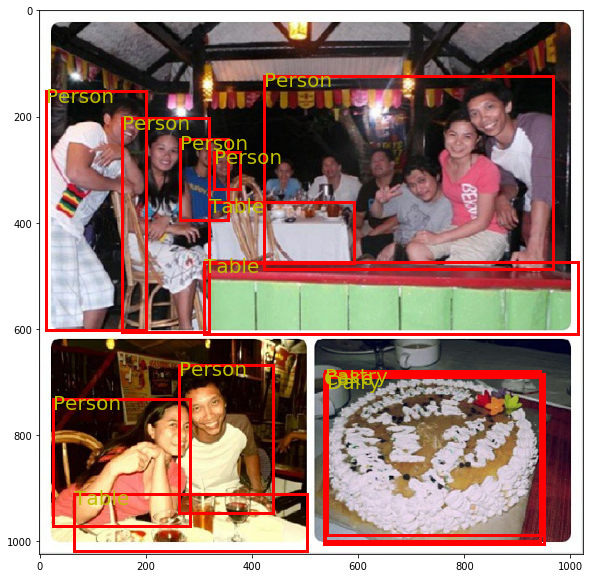

In [5]:
img_id = df['ImageID'][0]
img = mpimg.imread('/root/data/OID/images/train/'+img_id+'.jpg')
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)